In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from colorama import Fore

In [2]:
data=pd.read_excel('/Users/omarhassan/Documents/GitHub/BigMart-Analysis/Dataset/final_dataset.xlsx',sheet_name='Original_Imputed')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,REGULAR,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,REGULAR,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [3]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Exploratory Data Analysis

In [4]:
def plots(col):
    df1=data.groupby(col)
    sales1=dict()
    contents=data[col].unique()
    for content in contents:
        sale=0
        sale=df1.get_group(content).Item_Outlet_Sales.sum()
        sales1[content]=sale
    
    fig, ax = plt.subplots(figsize =(16, 9))
    ax.barh(list(sales1.keys()), list(sales1.values()))
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
    ax.invert_yaxis()
    ax.set_title(col+' vs Item_Outlet_Sales',loc='left')
    plt.show()

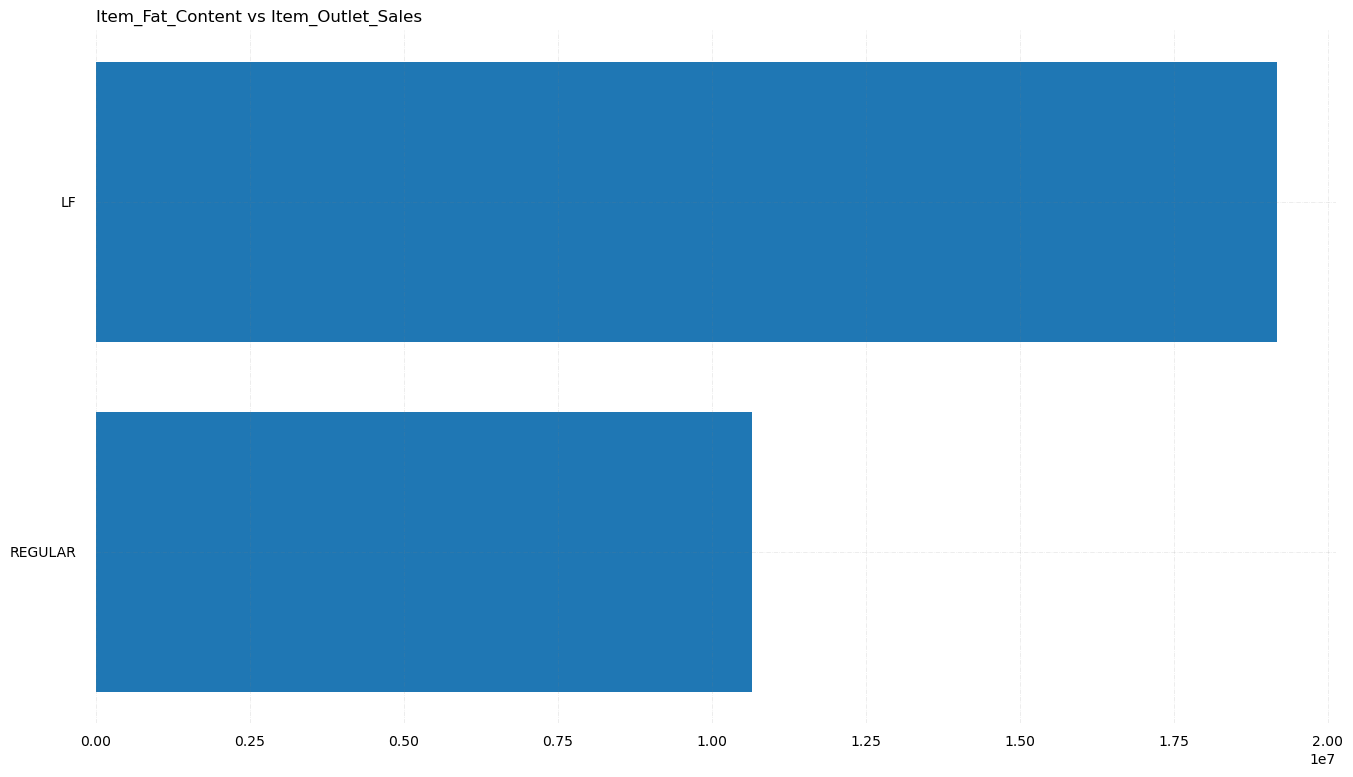

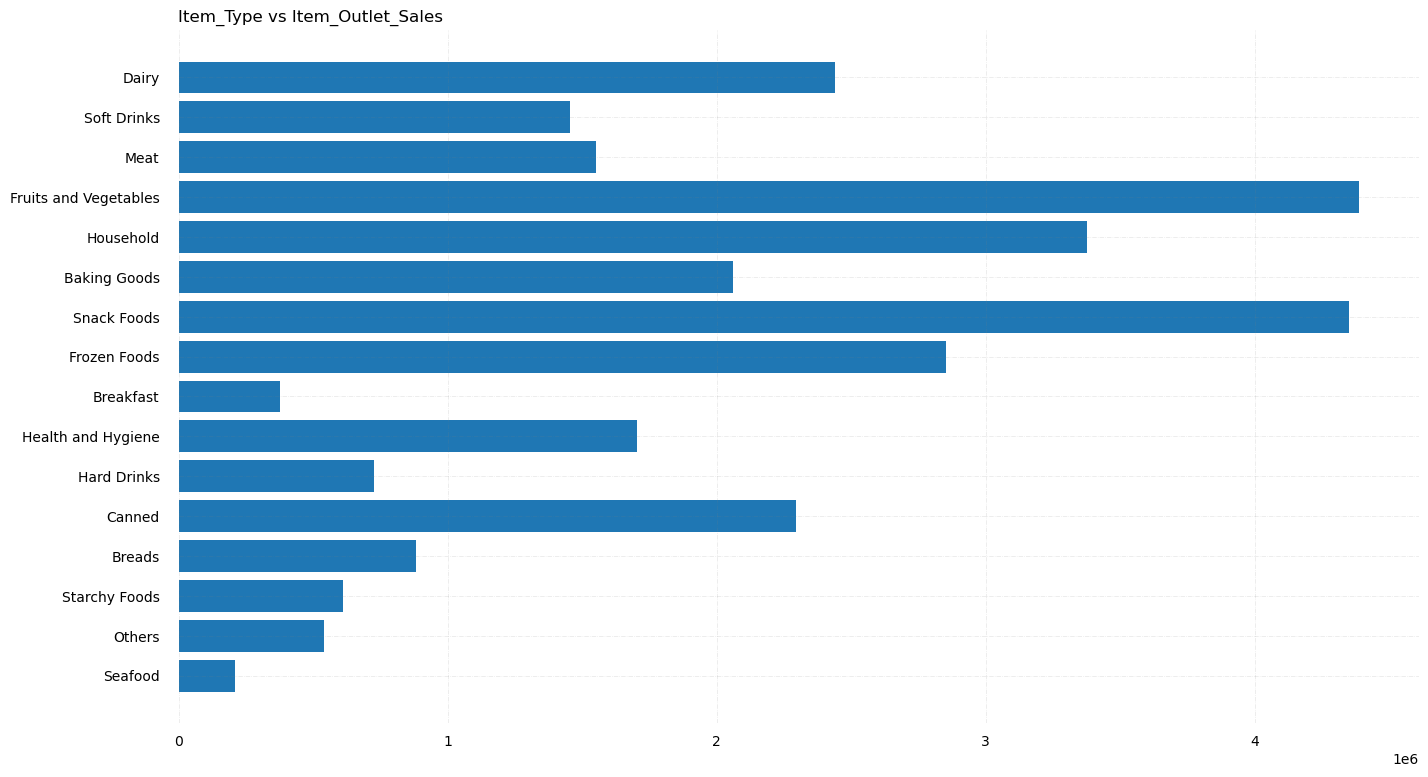

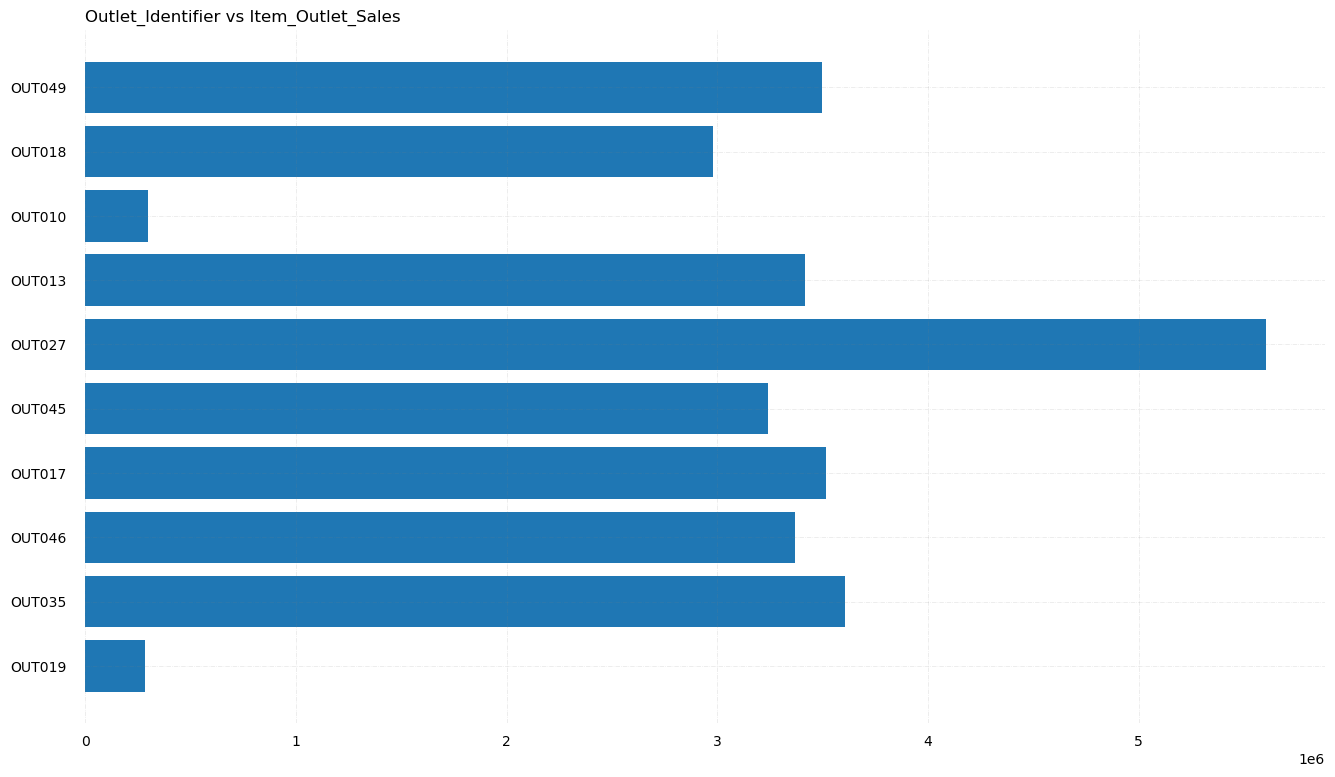

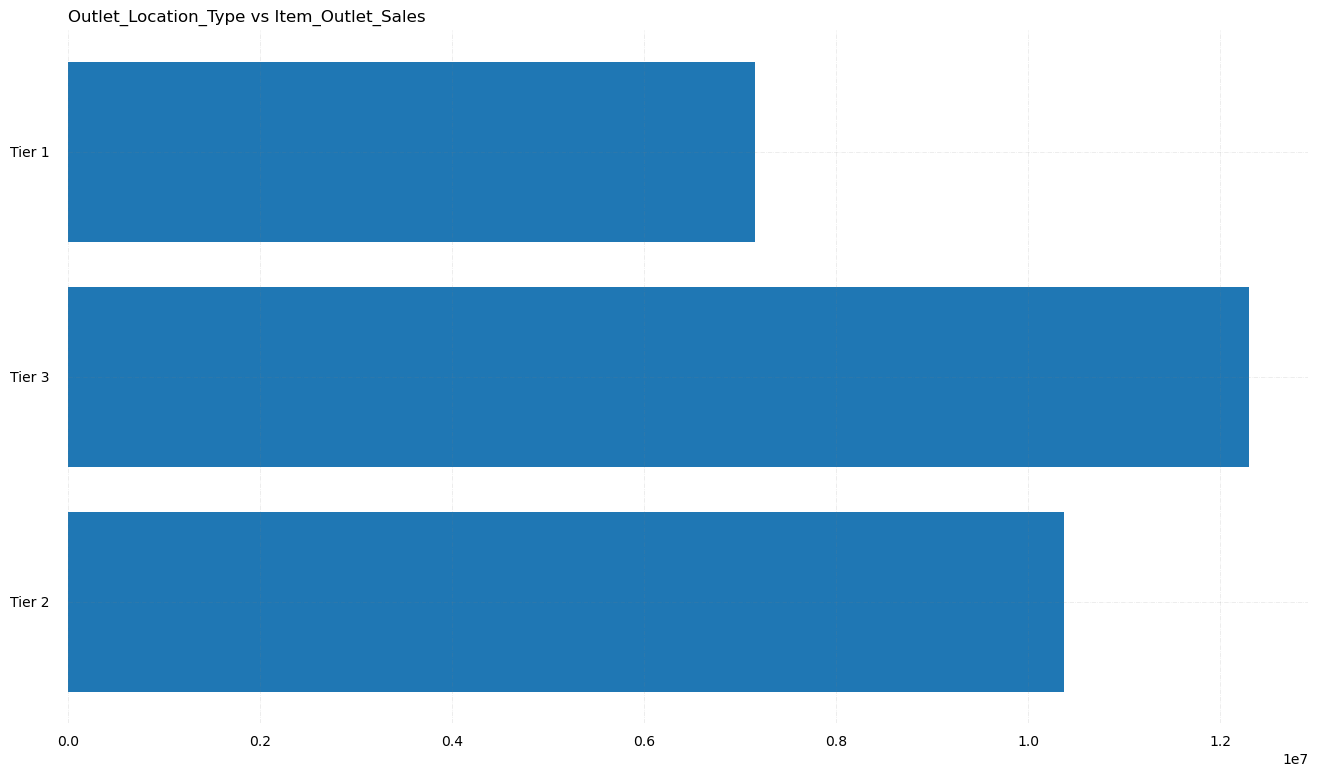

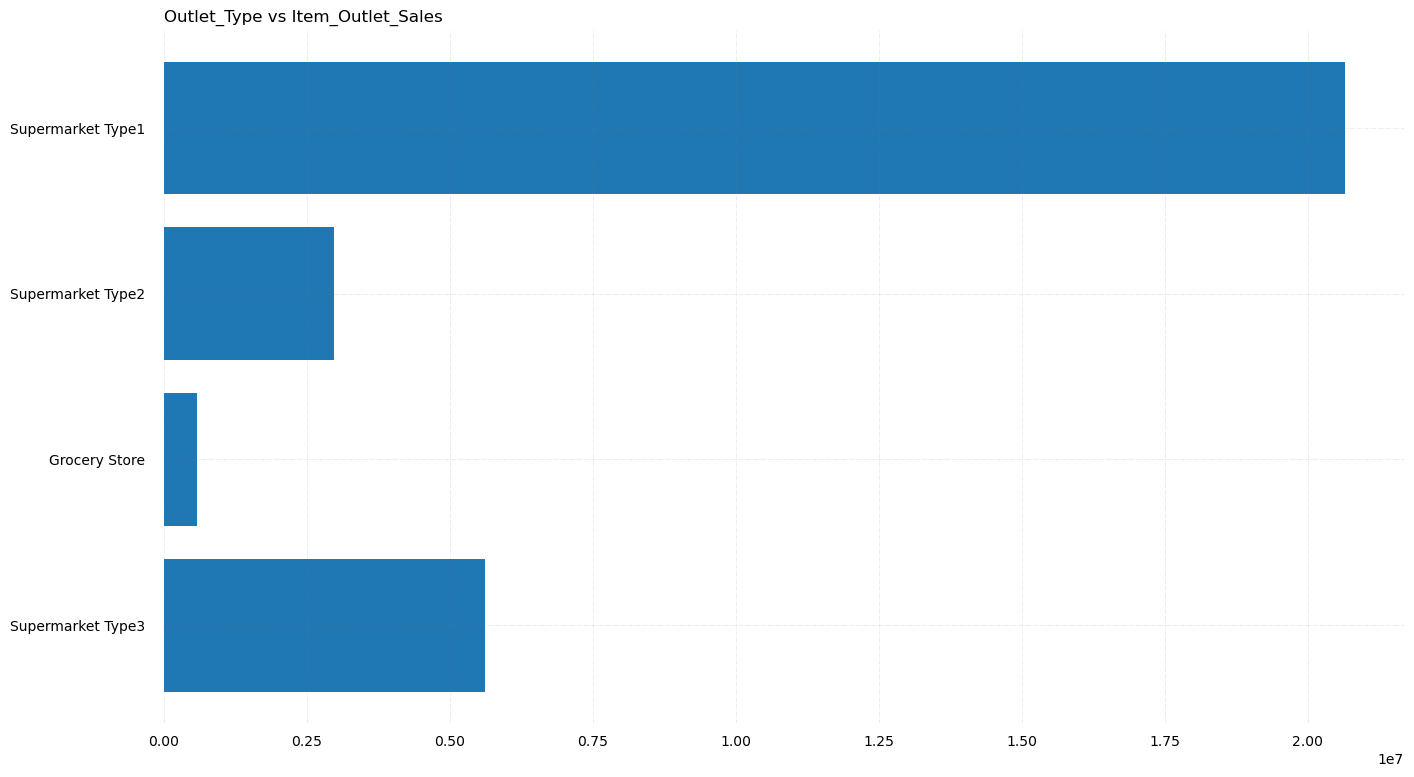

In [5]:
columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']
for col in columns:
    plots(col)

It is seen that Low Fat items make more sales than regular.  
Fruits and Vegetables type items make the most sales, followed by Snack Foods and then Household.  
OUT027 is seen to have the most sales, followed by OUT035.
Location Type of Tier 3 makes the most sales out of all the Tiers.
Outlet Type of Supermarket Type1 makes the most sales by a huge margin compared to other outlet types.  

On the other side,  
Seafood makes the least sales. Followed by item type of Breakfast and Others.  
OUT019 and OUT010 made the least sales among all outlets.  
Tier 1 makes the least sales among all Tiers.  
Grocery Store and and Supermarket Type2 make the least sales among all Outlet Types.

Let us analyse why that is.

In [6]:
#Item_Fat_Content
df1=data.groupby('Item_Fat_Content')
print('Low Fat')
print("Max Price: ",df1.get_group('LF').Item_MRP.max())
print("Min Price: ",df1.get_group('LF').Item_MRP.min())
print("Max Item Weight: ",df1.get_group('LF').Item_Weight.max())
print("Min Item Weight: ",df1.get_group('LF').Item_Weight.min())
print("Max Item Visibility: ",df1.get_group('LF').Item_Visibility.max())
print("Min Item Visibility: ",df1.get_group('LF').Item_Visibility.min())
print('Regular')
print("Max Price: ",df1.get_group('REGULAR').Item_MRP.max())
print("Min Price: ",df1.get_group('REGULAR').Item_MRP.min())
print("Max Item Weight: ",df1.get_group('REGULAR').Item_Weight.max())
print("Min Item Weight: ",df1.get_group('REGULAR').Item_Weight.min())
print("Max Item Visibility: ",df1.get_group('REGULAR').Item_Visibility.max())
print("Min Item Visibility: ",df1.get_group('REGULAR').Item_Visibility.min())

Low Fat
Max Price:  266.8884
Min Price:  31.29
Max Item Weight:  21.35
Min Item Weight:  4.59
Max Item Visibility:  0.328390948
Min Item Visibility:  0.0
Regular
Max Price:  266.8884
Min Price:  32.0558
Max Item Weight:  21.2
Min Item Weight:  4.555
Max Item Visibility:  0.313541543
Min Item Visibility:  0.0


Other than some minute differences in Item Visibility (LF>REGULAR), the two have very less differences in terms of weight and MRP. It can be concluded that the customers prefer the lower fat content over regular fat content because of the fat content in these items respectively instead of other variables in the dataset.

In [7]:
df1=data.groupby('Item_Type').get_group('Fruits and Vegetables')
print('Fruits and Vegetables')
print("Max Price: ",df1.Item_MRP.max())
print("Min Price: ",df1.Item_MRP.min())
print("Max Item Weight: ",df1.Item_Weight.max())
print("Min Item Weight: ",df1.Item_Weight.min())
print("Max Item Visibility: ",df1.Item_Visibility.max())
print("Min Item Visibility: ",df1.Item_Visibility.min())
df1=data.groupby('Item_Type').get_group('Seafood')
print('Seafood')
print("Max Price: ",df1.Item_MRP.max())
print("Min Price: ",df1.Item_MRP.min())
print("Max Item Weight: ",df1.Item_Weight.max())
print("Min Item Weight: ",df1.Item_Weight.min())
print("Max Item Visibility: ",df1.Item_Visibility.max())
print("Min Item Visibility: ",df1.Item_Visibility.min())

Fruits and Vegetables
Max Price:  264.2252
Min Price:  34.819
Max Item Weight:  21.35
Min Item Weight:  5.46
Max Item Visibility:  0.32111501
Min Item Visibility:  0.0
Seafood
Max Price:  240.488
Min Price:  33.7216
Max Item Weight:  20.75
Min Item Weight:  5.365
Max Item Visibility:  0.256152243
Min Item Visibility:  0.0


Other than differences in Item Visibility (Fruits and Vegetables>Seafood), the two have very less differences in terms of weight and MRP. It can be concluded that the customers purchase Fruits and Vegetables more than seafood due to higher personal preference. This may be because the customers have a higher preference for fruits and vegetables over seafood due to personal reasons or fators that connot be explained via the variables present in the dataset.

In [8]:
df1=data.groupby('Outlet_Identifier').get_group('OUT027')
print('OUT027')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')
df1=data.groupby('Outlet_Identifier').get_group('OUT019')
print('OUT019')
print(df1['Item_Type'].value_counts())
df1=data.groupby('Outlet_Identifier').get_group('OUT010')
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')
print('OUT010')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())

OUT027
Snack Foods              220
Fruits and Vegetables    220
Household                170
Frozen Foods             155
Dairy                    125
Canned                   120
Baking Goods             119
Health and Hygiene        95
Soft Drinks               80
Meat                      80
Breads                    45
Hard Drinks               40
Starchy Foods             30
Others                    30
Breakfast                 20
Seafood                   10
Name: Item_Type, dtype: int64
Sales:  5605149.931989629


OUT019
Fruits and Vegetables    126
Snack Foods              116
Frozen Foods              96
Household                 93
Dairy                     70
Baking Goods              67
Canned                    66
Health and Hygiene        53
Meat                      49
Soft Drinks               43
Breads                    28
Others                    22
Hard Drinks               19
Breakfast                 14
Starchy Foods             12
Seafood                    6


OUT027 made the most sales with Fruits and Vegetables, which is the most preferred item type we found in the previous analysis. This lead them to make the most sales out of all the outlets.

In [9]:
df1=data.groupby('Outlet_Location_Type').get_group('Tier 3')
print('Tier 3')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')
df1=data.groupby('Outlet_Location_Type').get_group('Tier 2')
print('Tier 2')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')
df1=data.groupby('Outlet_Location_Type').get_group('Tier 1')
print('Tier 1')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')

Tier 3
Fruits and Vegetables    796
Snack Foods              782
Household                610
Frozen Foods             557
Dairy                    444
Baking Goods             429
Canned                   423
Health and Hygiene       336
Meat                     290
Soft Drinks              286
Breads                   165
Hard Drinks              144
Others                   108
Starchy Foods            107
Breakfast                 72
Seafood                   34
Name: Item_Type, dtype: int64
Sales:  12302367.055634148


Tier 2
Snack Foods              656
Fruits and Vegetables    652
Household                508
Frozen Foods             464
Dairy                    374
Canned                   356
Baking Goods             352
Health and Hygiene       279
Meat                     239
Soft Drinks              238
Breads                   134
Hard Drinks              120
Starchy Foods             90
Others                    90
Breakfast                 60
Seafood                   29

The same pattern is noted here in Tier comparisons, The tiers that sold more Fruits and Vegetables have the higher sales.

In [10]:
df1=data.groupby('Outlet_Type').get_group('Supermarket Type1')
print('Supermarket Type1')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')
df1=data.groupby('Outlet_Type').get_group('Supermarket Type2')
print('Supermarket Type2')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')
df1=data.groupby('Outlet_Type').get_group('Grocery Store')
print('Grocery Store')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')

Supermarket Type1
Snack Foods              1311
Fruits and Vegetables    1311
Household                1013
Frozen Foods              928
Dairy                     746
Canned                    713
Baking Goods              709
Health and Hygiene        563
Meat                      477
Soft Drinks               477
Breads                    268
Hard Drinks               239
Starchy Foods             180
Others                    180
Breakfast                 120
Seafood                    59
Name: Item_Type, dtype: int64
Sales:  20651869.534359112


Supermarket Type2
Snack Foods              219
Fruits and Vegetables    219
Household                168
Frozen Foods             154
Dairy                    124
Baking Goods             119
Canned                   119
Health and Hygiene        92
Soft Drinks               80
Meat                      78
Breads                    45
Hard Drinks               39
Others                    30
Starchy Foods             30
Breakfast          

The same pattern is again noticed here, further proving the analysis where Fruits and Vegetables play an important part in making sales.

In [11]:
data[['Outlet_Type','Outlet_Location_Type']].value_counts()

Outlet_Type        Outlet_Location_Type
Supermarket Type1  Tier 2                  4641
                   Tier 1                  3100
Supermarket Type3  Tier 3                  1559
Supermarket Type1  Tier 3                  1553
Supermarket Type2  Tier 3                  1546
Grocery Store      Tier 3                   925
                   Tier 1                   880
dtype: int64

Supermarket Type1 has the most sales and two location tiers, but then Grocery Store has the least sales and has two location tiers. One of the tiers available in Grocery Store is a higher tier than the ones available in Supermarkwet Type1, but then the sales made by each of them have a huge difference.  
We will analyse why such a difference exists. 

In [12]:
df1=data.groupby(['Outlet_Type','Outlet_Location_Type']).get_group(('Supermarket Type1','Tier 2'))
print('Supermarket Type1 and Tier 2')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')
df1=data.groupby(['Outlet_Type','Outlet_Location_Type']).get_group(('Supermarket Type1','Tier 1'))
print('Supermarket Type1 and Tier 1')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')
df1=data.groupby(['Outlet_Type','Outlet_Location_Type']).get_group(('Supermarket Type3','Tier 3'))
print('Supermarket Type3 and Tier 3')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')
df1=data.groupby(['Outlet_Type','Outlet_Location_Type']).get_group(('Supermarket Type1','Tier 3'))
print('Supermarket Type1 and Tier 3')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')
df1=data.groupby(['Outlet_Type','Outlet_Location_Type']).get_group(('Supermarket Type2','Tier 3'))
print('Supermarket Type2 and Tier 3')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')
df1=data.groupby(['Outlet_Type','Outlet_Location_Type']).get_group(('Grocery Store','Tier 3'))
print('Grocery Store and Tier 3')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')
df1=data.groupby(['Outlet_Type','Outlet_Location_Type']).get_group(('Grocery Store','Tier 1'))
print('Grocery Store and Tier 1')
print(df1['Item_Type'].value_counts())
print('Sales: ',df1['Item_Outlet_Sales'].sum())
print('\n')

Supermarket Type1 and Tier 2
Snack Foods              656
Fruits and Vegetables    652
Household                508
Frozen Foods             464
Dairy                    374
Canned                   356
Baking Goods             352
Health and Hygiene       279
Meat                     239
Soft Drinks              238
Breads                   134
Hard Drinks              120
Starchy Foods             90
Others                    90
Breakfast                 60
Seafood                   29
Name: Item_Type, dtype: int64
Sales:  10366826.740720754


Supermarket Type1 and Tier 1
Fruits and Vegetables    439
Snack Foods              435
Household                337
Frozen Foods             309
Dairy                    248
Canned                   239
Baking Goods             238
Health and Hygiene       190
Soft Drinks              159
Meat                     158
Breads                    89
Hard Drinks               79
Others                    60
Starchy Foods             60
Breakfast    

Supermarket Type1 and tier 2 makes the most sales as they sell the most of Fruits and vegetables and Snack Foods, two of the item types that have been analysed to greatly influence sales. If other Outlet types and location type pairs focus more on the sales of these types of items, they can make more sales. It is seen that the grocery store have much lesser sales when compared to supermarket type1, if they manage to increase the number of sales in the influencial item types like Fruits and vegetables, Snack Foods, Household, etc, they can improve their sales. 

## Conclusion

The Item Types of Fruits and vegetables, Snack foods & Household greatly influence the Outlet Sales. Although Tier 3 outlets are plenty in number, tier 2 seems to make more sales than tier 3 and tier 1. Factors that arent present in the dataset might influence greater sales in this tier than the other tiers.Preferably opening Tier 1 location types in other Outlet types might greatly improve their Sales. It is also seen that Tier 1 and Tier 2 location types make more sales than tier 3, so preferably replacing tier 3 location types with tier 2 or tier 1 might greatly increase sales made by the outlet due to factors not present in this dataset.

## Model Selection

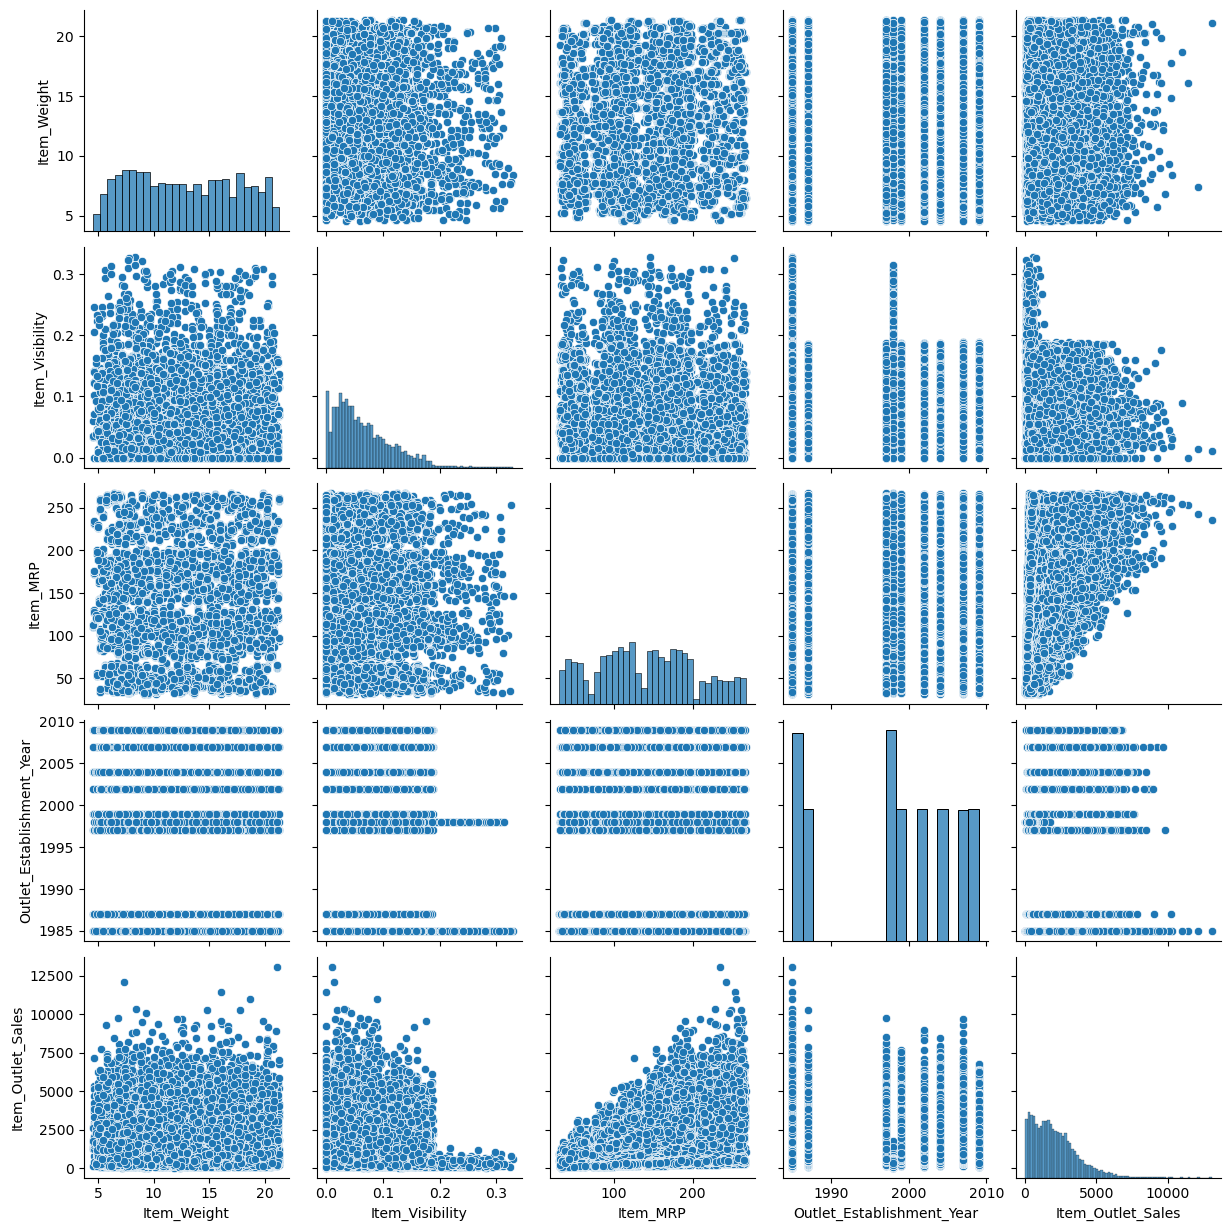

In [13]:
sns.pairplot(data)

The data has a varied set of distributions followed by each of these variables in the dataset. Moreover Linearity is not to be seen between any of these variables and the dependent variable and normality is not followed by the data. So we cannot use Multiple Linear Regression model for this dataset. We are first going to attempt using the Support Vector Regression Model on this dataset.

In [14]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [15]:
cat=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
metric=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

In [16]:
data_conv=pd.concat([data[metric],pd.get_dummies(data[cat],drop_first=True)],axis=1).copy()
data_conv.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [17]:
x=data_conv.drop(['Item_Outlet_Sales'],axis=1).copy()
y=data_conv['Item_Outlet_Sales'].copy()

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [22]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.9 MB/s eta 0:00:00


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from skopt import BayesSearchCV

In [31]:
regressor= RandomForestRegressor(oob_score=True,random_state=10)
parameters={
    'n_estimators':(100,1000),
    'max_depth':(3,10),
    'max_features':(0.1,1.0),
    'min_samples_split': (2, 50),
    'min_samples_leaf': (1, 50)
}
search=BayesSearchCV(regressor,parameters,n_jobs=-1,return_train_score=True,random_state=10)
search.fit(x_train,y_train)

BayesSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=10),
              n_jobs=-1, random_state=10, return_train_score=True,
              search_spaces={'max_depth': (3, 10), 'max_features': (0.1, 1.0),
                             'min_samples_leaf': (1, 50),
                             'min_samples_split': (2, 50),
                             'n_estimators': (100, 1000)})

In [32]:
search.best_params_

OrderedDict([('max_depth', 9),
             ('max_features', 0.5750603960465961),
             ('min_samples_leaf', 6),
             ('min_samples_split', 37),
             ('n_estimators', 952)])

In [33]:
regressor1=RandomForestRegressor(n_estimators=952,max_features=0.5750603960465961,max_depth=9,min_samples_leaf=6,
                                 min_samples_split=37,oob_score=True,random_state=10)
regressor1.fit(x_train,y_train)
y_pred=regressor1.predict(x_test)
y_train_pred=regressor1.predict(x_train)

In [34]:
print('oob score: ',regressor1.oob_score_)
y_pred=regressor1.predict(x_test)
print('Test Set: ',r2_score(y_test,y_pred))
y_train_pred=regressor1.predict(x_train)
print('Train Set: ',r2_score(y_train,y_train_pred))

oob score:  0.689459690981496
Test Set:  0.695790388659801
Train Set:  0.7239516005763709
